In [1]:
from sklearn.datasets import load_boston

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


In [3]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
y = data ['MEDV']

In [6]:
X = data.drop ('MEDV', axis = 1)

In [7]:
print(f'минимальное значение целевой переменной {np.amin(y)}')
print(f'максимальное значение целевой переменной {np.amax(y)}')
print(f'медиана целевой переменной {np.median(y)}')
print(f'среднее значение целевой переменной {np.mean(y)}')
print(f'стандратное отклонение целевой переменной {np.std(y)}')

минимальное значение целевой переменной 5.0
максимальное значение целевой переменной 50.0
медиана целевой переменной 21.2
среднее значение целевой переменной 22.532806324110698
стандратное отклонение целевой переменной 9.188011545278206


In [8]:
def get_score(X,y, random_seed=42, model=None):
    """
    Получаем accuracy для оценки качества данных
    """
    if model is None:
        model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed )  
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [39]:
def get_one_hot(X, cols):
    for each in cols:
        dummies = pd.get_dummies(X[each], prefix=each, drop_first=False) #разбивает колонку на несколько со значениями 0\1, рез-т df
        X = pd.concat([X, dummies], axis=1) #конкатенирует X и новые разбитые столбцы
    return X

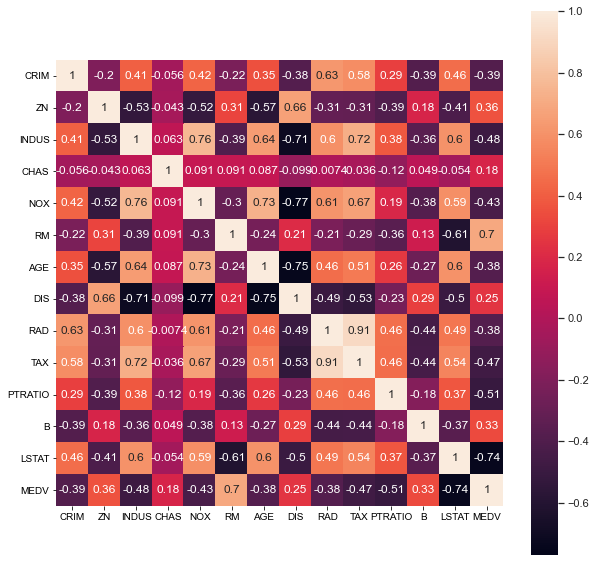

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
sns.set (font_scale = 1)
sns.heatmap(data.corr(),annot=True,
                cbar = True,
                square=True,
           ax =ax)

In [11]:
#зададим значения Х и у
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']
X = data[cols]
y = data['MEDV']

In [12]:
#запускаем линейную регрессию, смотрим на значения score
random_seed = 42
get_score(X, y)

0.711226005748496

In [13]:
#запускаем дерево решений
model2 = DecisionTreeRegressor()
#разделим выборку на тестовую и обучающую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)
# задаем варианты гиперпараметров для выбора наилучших
parametrs = {'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

In [14]:
#выбираем наилучшие параметры для дерева решений
grid = GridSearchCV(model2, parametrs, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2)})

In [15]:
# смотрим значения гиперпараметров для наилучшей модели
grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 4}

In [18]:
# обучаем модель на наилучших гиперпараметрах дерева решений
model_best = DecisionTreeRegressor(max_depth=5, min_samples_leaf=7, min_samples_split = 2)
model_best.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=7)

In [19]:
# смотрим на значения ошибок и score
y_pred = model_best.predict(X_test)
print('Accuracy model_best:', model_best.score(X_test, y_test))

Accuracy model_best: 0.7718628847351936


### Т.е. по сравнению с обычной линейной регрессией дерево решений с наилучшими решениями дало прирост score c 
## 0.711226005748496 на 0.7718628847351936

In [20]:
#сделаем предобработку датасета
#удаляем из датасета - это значительные выбросы и низкий MEDV, и смотрим скор

data1 = data[data['CRIM'] < 60]
X1 = data1[cols]
y1 = data1['MEDV']
#разделим выборку на тестовую и обучающую
X_train, X_test, y_train, y_test = train_test_split (X1, y1, test_size = 0.3, random_state = random_seed)

In [21]:
get_score(X1, y1)

0.7579405335724028

In [23]:
#запускаем дерево решений
model2 = DecisionTreeRegressor()
# задаем варианты гиперпараметров для выбора наилучших
parametrs = {'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

In [24]:
#выбираем наилучшие параметры для дерева решений
grid = GridSearchCV(model2, parametrs, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2)})

In [25]:
# смотрим значения гиперпараметров для наилучшей модели
grid.best_params_

{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [26]:
# обучаем модель на наилучших гиперпараметрах дерева решений
model_best = DecisionTreeRegressor(max_depth=7, min_samples_leaf=2, min_samples_split = 2)
model_best.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=2)

In [27]:
# смотрим на значения ошибок и score
y_pred = model_best.predict(X_test)
print('Accuracy model_best:', model_best.score(X_test, y_test))

Accuracy model_best: 0.8254528605543299


### Т.е. по сравнению с обычной линейной регрессией дерево решений с наилучшими решениями дало прирост score c 
## 1. linear 0.711226005748496 decision tree 0.7718628847351936
## 2. linear 0.7579405335724028 decision tree 0.8254528605543299 deleted ['CRIM'] > 60

In [31]:
# удаляем из датасета ['RM'] < 4
data2 = data1[data1['RM'] > 4]
X2 = data2[cols]
y2 = data2['MEDV']
#разделим выборку на тестовую и обучающую
X_train, X_test, y_train, y_test = train_test_split (X2, y2, test_size = 0.3, random_state = random_seed)

In [32]:
# для линейной регрессии
get_score(X2, y2)

0.8280021901730786

In [34]:
#выбираем наилучшие параметры для дерева решений
grid = GridSearchCV(model2, parametrs, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2)})

In [35]:
# смотрим значения гиперпараметров для наилучшей модели
grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 4}

In [36]:
# обучаем модель на наилучших гиперпараметрах дерева решений
model_best = DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, min_samples_split = 4)
model_best.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=4)

In [37]:
# смотрим на значения ошибок и score
y_pred = model_best.predict(X_test)
print('Accuracy model_best:', model_best.score(X_test, y_test))

Accuracy model_best: 0.880813209656021


### Т.е. по сравнению с обычной линейной регрессией дерево решений с наилучшими решениями дало прирост score c 
## 1. linear 0.711226005748496 decision tree 0.7718628847351936
## 2. linear 0.7579405335724028 decision tree 0.8254528605543299 deleted ['CRIM'] > 60
## 3. linear 0.8280021901730786 decision tree 0.880813209656021 deleted ['RM'] < 4

In [40]:
# переводим RAD в категориальную переменную и оставляем только наиболее влияющие значения RAD
data3 = get_one_hot(data2, ['RAD'])
data3 = data3.drop(columns=['RAD'])
cols = ['ZN', 'CHAS', 'RM', 'DIS', 'PTRATIO', 'LSTAT', 'RAD_2', 'RAD_4', 'RAD_6', 'RAD_8', 'AGE', 'B', 'RAD_5', 'RAD_24', 'RAD_3', 'TAX', 'RAD_7']

In [41]:
X3 = data3[cols]
y3 = data3['MEDV']
get_score(X3, y3)

0.832720406717588

In [42]:
#разделим выборку на тестовую и обучающую
X_train, X_test, y_train, y_test = train_test_split (X3, y3, test_size = 0.3, random_state = random_seed)
#выбираем наилучшие параметры для дерева решений
grid = GridSearchCV(model2, parametrs, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2)})

In [43]:
# смотрим значения гиперпараметров для наилучшей модели
grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [45]:
# обучаем модель на наилучших гиперпараметрах дерева решений
model_best = DecisionTreeRegressor(max_depth=5, min_samples_leaf=3, min_samples_split = 2)
model_best.fit(X_train, y_train)
# смотрим на значения ошибок и score
y_pred = model_best.predict(X_test)
print('Accuracy model_best:', model_best.score(X_test, y_test))

Accuracy model_best: 0.8609056394387894


### Т.е. по сравнению с обычной линейной регрессией дерево решений с наилучшими решениями дало прирост score c 
## 1. linear 0.711226005748496 decision tree 0.7718628847351936
## 2. linear 0.7579405335724028 decision tree 0.8254528605543299 deleted ['CRIM'] > 60
## 3. linear 0.8280021901730786 decision tree 0.880813209656021 deleted ['RM'] < 4
## 4. linear 0.832720406717588 decision tree 0.8609056394387894 one-hot-encoding 

### Вывод останавливаемся на 3-ем шаге предобработки, так как с ростом кол-ва переменных после one-hot-encoding значение score снижается, пробуем удалить признаки, слабо коррелирующие с целевой переменной MEDV

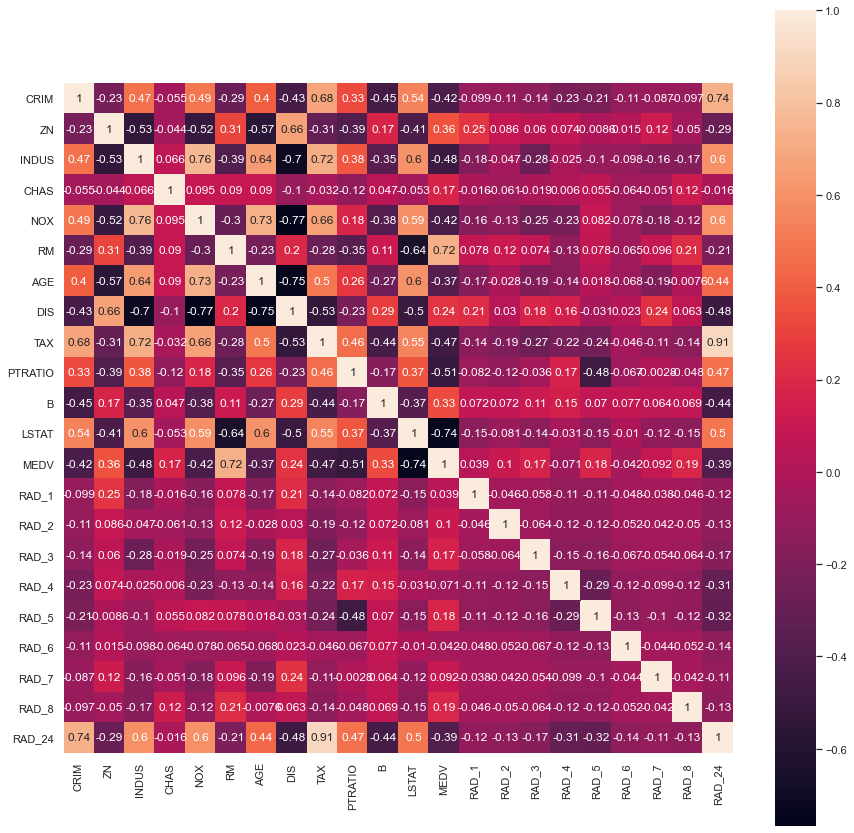

In [49]:
fig, ax = plt.subplots(figsize=(15,15))
sns.set (font_scale = 1)
sns.heatmap(data3.corr(),annot=True,
                cbar = True,
                square=True,
           ax =ax)

In [50]:
# удаляем столбцы RAD_7, RAD_6, RAD_4, RAD_2

In [51]:
cols = ['ZN', 'CHAS', 'RM', 'DIS', 'PTRATIO', 'LSTAT', 'RAD_8', 'AGE', 'B', 'RAD_5', 'RAD_24', 'RAD_3', 'TAX']

In [52]:
# линейная регрессия
X4 = data3[cols]
y4 = data3['MEDV']
get_score(X4, y4)

0.8250152520130721

In [54]:
#разделим выборку на тестовую и обучающую
X_train, X_test, y_train, y_test = train_test_split (X4, y4, test_size = 0.3, random_state = random_seed)
#выбираем наилучшие параметры для дерева решений
grid = GridSearchCV(model2, parametrs, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2)})

In [56]:
# смотрим значения гиперпараметров для наилучшей модели
grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 4}

In [57]:
# обучаем модель на наилучших гиперпараметрах дерева решений
model_best = DecisionTreeRegressor(max_depth=5, min_samples_leaf=3, min_samples_split = 4)
model_best.fit(X_train, y_train)
# смотрим на значения ошибок и score
y_pred = model_best.predict(X_test)
print('Accuracy model_best:', model_best.score(X_test, y_test))

Accuracy model_best: 0.8620455353503675


### Т.е. по сравнению с обычной линейной регрессией дерево решений с наилучшими решениями дало прирост score c 
## 1. linear 0.711226005748496 decision tree 0.7718628847351936
## 2. linear 0.7579405335724028 decision tree 0.8254528605543299 deleted ['CRIM'] > 60
## 3. linear 0.8280021901730786 decision tree 0.880813209656021 deleted ['RM'] < 4
## 4. linear 0.832720406717588 decision tree 0.8609056394387894 one-hot-encoding 
## 5. linear 0.8250152520130721 decision tree 0.8620455353503675 deleted RAD_7, RAD_6, RAD_4, RAD_2

Score после удаления столбцов RAD_7, RAD_6, RAD_4, RAD_2 вырос незначительно.

Наилучшую оценку 0.880813209656021 получили на 3-ем этапе для дерева решений

Также отмечу, что при использовании one-hot-encoding для decision tree может снизиться score